In [3]:
import os

import tensorflow as tf

from data_generator import DataSet, show_batch_image_with_label, output_tensor_to_label

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

%matplotlib inline

ModuleNotFoundError: No module named 'data_generator'

In [10]:
labels_dir = os.path.join("gtCoarse", "train")
images_dir = os.path.join("leftImg8bit", "train")
n_classes = 34
image_size = (640, 320)


In [11]:
dataset = DataSet(images_dir=images_dir, labels_dir=labels_dir, n_classes=n_classes, batch_size=3)

2975 images found in directory leftImg8bit/train


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


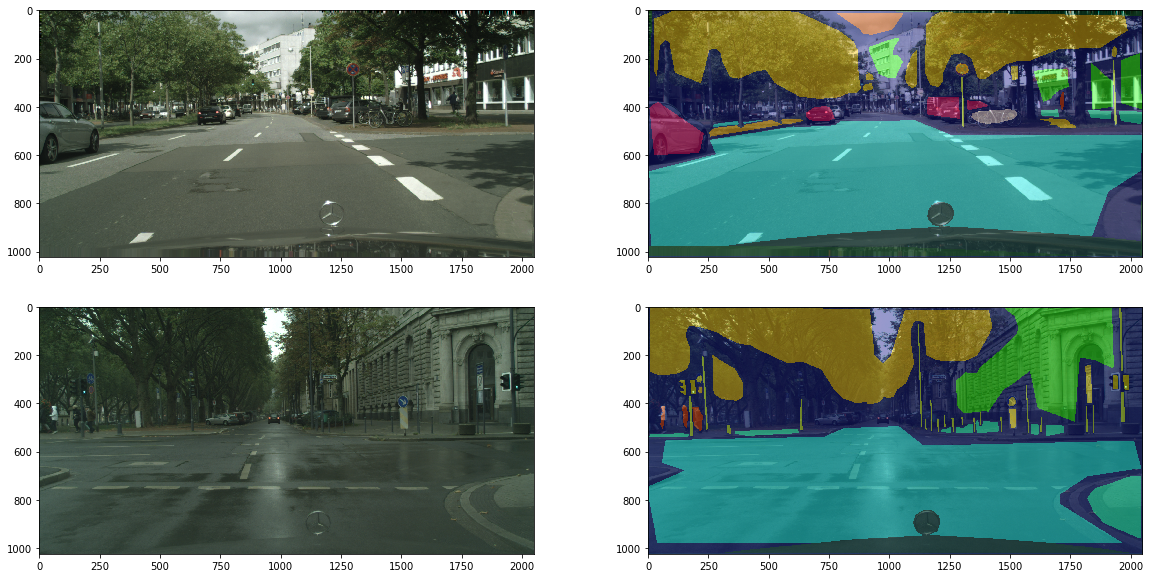

In [4]:
dataset.show_random_samples(2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


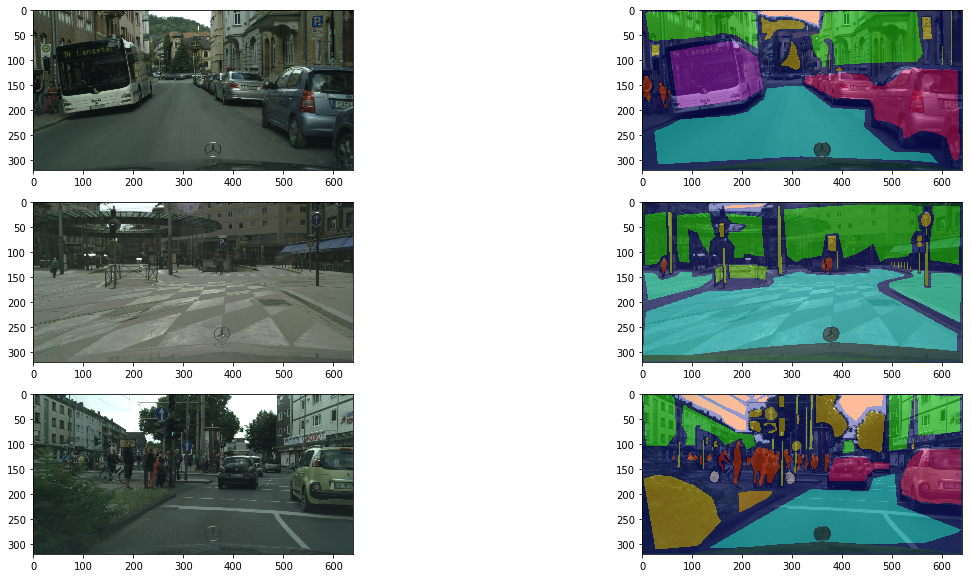

In [5]:
train_generator = dataset.generate_data(image_size=image_size, shuffle=True)
x, y = next(train_generator)
show_batch_image_with_label(x, [output_tensor_to_label(y)])

In [1]:
import cv2
from keras.models import load_model
from utils import create_inference_model

# model = load_model('model.h5')
model = create_inference_model('model.h5')
res = model.predict(x)
y = output_tensor_to_label(y)
res_resized = [cv2.resize(res_label, image_size, interpolation=cv2.INTER_NEAREST) for
               res_label in res]

show_batch_image_with_label(x, [y, res_resized])

Using TensorFlow backend.


ModuleNotFoundError: No module named 'utils'